In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
forest_df = pd.read_csv('forestfires.csv')
forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
def get_season(month):
    if month in ['nov','dec','jan','feb']:
        return 'winter'
    if month in ['mar','apr']:
        return 'spring'
    if month in ['may','jun','jul']:
        return 'summer'
    if month in ['aug','sep','oct']:
        return 'rainy'

In [4]:
forest_df['season'] = forest_df['month'].apply(get_season)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
  
forest_df['day']= le.fit_transform(forest_df['day']) 
forest_df['month']= le.fit_transform(forest_df['month'])
forest_df['season']= le.fit_transform(forest_df['season'])
forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [6]:
forest_df['area'] = np.log1p(forest_df['area'])
# .max()

In [7]:
forest_df['area'].max()

6.995619625423205

In [8]:
def get_risk(area):
    if area < 3:
        return 0
    if area >= 3:
        return 1
    
forest_df['fire risk']  = forest_df['area'].apply(get_risk)


In [9]:
zero_count = (forest_df['fire risk'] == 0).sum()
one_count = (forest_df['fire risk']==1).sum()
print(f'no fire: {zero_count}, fire : {one_count}')

no fire: 457, fire : 60


In [16]:
forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season,fire risk
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000,1,0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000,0,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000,0,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000,1,0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871,0,0
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592,0,1
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152,0,0
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000,0,0


In [11]:
forest_df.isna().sum()

X            0
Y            0
month        0
day          0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
season       0
fire risk    0
dtype: int64

In [12]:
cate_columns = forest_df.select_dtypes(include='object').columns.tolist()
nume_columns = forest_df.select_dtypes(exclude='object').columns.tolist()
print('Categorical columns: ',cate_columns)
print('Numerical columns: ',nume_columns)

Categorical columns:  []
Numerical columns:  ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'season', 'fire risk']


In [13]:
forest_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'season', 'fire risk'],
      dtype='object')

In [20]:
forest_df2 = forest_df[['temp', 'RH','wind', 'fire risk']]

In [15]:
forest_df2[forest_df2['fire risk'] == 0].head()

,temp,RH,wind,fire risk
0,8.2,51,6.7,0
1,18.0,33,0.9,0
2,14.6,33,1.3,0
3,8.3,97,4.0,0
4,11.4,99,1.8,0


In [21]:
forest_df2.to_csv('processed_forestfire_data.csv')

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [57]:
data = pd.read_csv('processed_forestfire_data.csv', index_col=0)

[0 1] [457  60]


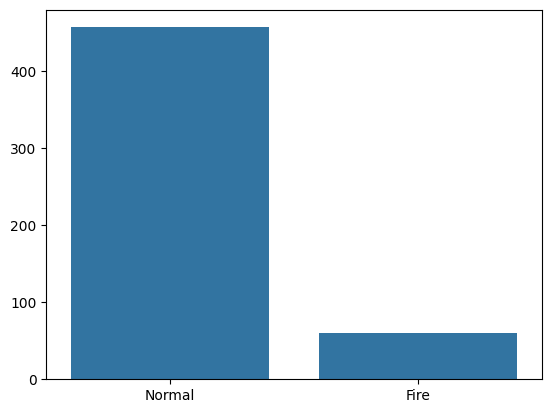

In [58]:
(unique, counts) = np.unique(data['fire risk'], return_counts=True)
print(unique,counts)
sns.barplot(x=['Normal','Fire'],y=counts)
plt.xticks()
plt.show()

In [59]:
# data = np.array(data)
# X, y = data[:,:-1],data[:,-1]
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_resample, y_resample = smote.fit_resample(X,y)

print(X_resample.shape)
print(y_resample.shape)
print(y_resample.value_counts())

(914, 3)
(914,)
fire risk
0    457
1    457
Name: count, dtype: int64


## Logistic Regression

In [81]:
data = pd.read_csv('processed_forestfire_data.csv', index_col=0)
data = np.array(data)
X, y = data[:,:-1],data[:,-1]
X_resample, y_resample = smote.fit_resample(X,y)
# X = X.astype('int')
# y = y.astype('int')

X_train, X_test,y_train,y_test = train_test_split(X_resample,y_resample, test_size=0.2,random_state=0)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)

ROC:  0.501987951807229
accuracy:  0.5027322404371585
F1:  0.5037747617216952


<Axes: >

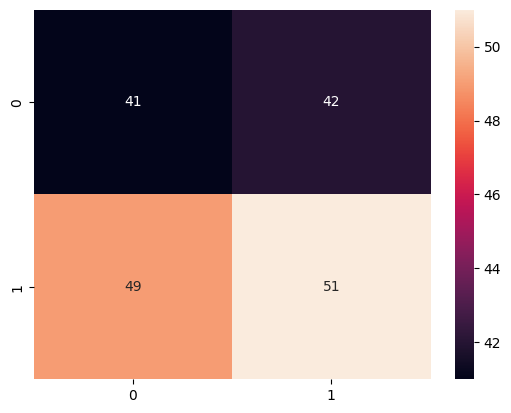

In [82]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('ROC: ', roc_auc_score(y_test,predictions))
print('accuracy: ', accuracy_score(y_test, predictions))
print('F1: ', f1_score(y_test, predictions, average='weighted'))
sns.heatmap(confusion_matrix(y_test, predictions),fmt="",annot=True)

In [79]:
input_features = [21,4,53]
input_array = np.array(input_features).reshape(1,-1)
# input_array = input_array.reshape(1,-1)
prediction = log_model.predict_proba(input_array)
output = float('{0:.{1}f}'.format(prediction[0][1],2))
print(output)

1.0


### Ensemble based xgboost

ROC:  0.8707831325301204
accuracy:  0.8688524590163934
F1:  0.8691118613690942
              precision    recall  f1-score   support

         0.0     0.8315    0.8916    0.8605        83
         1.0     0.9043    0.8500    0.8763       100

    accuracy                         0.8689       183
   macro avg     0.8679    0.8708    0.8684       183
weighted avg     0.8712    0.8689    0.8691       183



<Axes: >

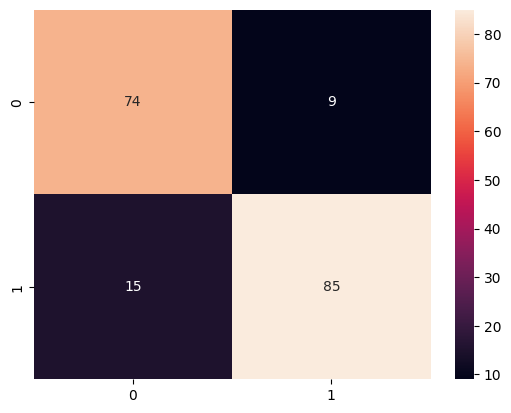

In [126]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

tree = XGBClassifier()
model = BaggingClassifier(base_estimator=tree, n_estimators=40, random_state=0)
#bagging_clf.fit(X_train, Y_train)

# evaluate(models_ensemble, X_train, X_test,y_train,y_test,'Bagging')

model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('ROC: ', roc_auc_score(y_test,predictions))
print('accuracy: ', accuracy_score(y_test, predictions))
print('F1: ', f1_score(y_test, predictions, average='weighted'))
print(classification_report(y_test, predictions, digits =4))
sns.heatmap(confusion_matrix(y_test, predictions),fmt="",annot=True)

In [ ]:
input_features = [20,45,90]
input_array = np.array(input_features).reshape(1,-1)
print(input_array)
# input_array = input_array.reshape(1,-1)
prediction = model.predict_proba(input_array)
output = float('{0:.{1}f}'.format(prediction[0][1],2))
# output = float(prediction[0][1])
print(output)
print(output*100)

[[20 45 90]]
0.55
55.00000000000001


#### XGboost shows remarkable imporvement in metrics